In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [362]:
data=pd.read_csv("bengaluru_house_prices.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [363]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [364]:
data=data.drop(columns=["area_type","availability","society","balcony"])

In [365]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [366]:
data.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


**Remve Null values**

In [367]:
data=data.dropna()
data.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


**Getting number of bedrooms from size**

In [368]:
data['bhk']=data['size'].apply(lambda x:float(x[0]))
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


**Converting square feet from string to float**

In [369]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
      return float(x)
    except:
      return None
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)

In [370]:
data=data[data['total_sqft'].notna()]

In [371]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


**1BHK must have 300 square feet**

In [372]:
data=data[data.total_sqft/data.bhk>=300]
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


In [373]:
data=data.drop(columns=["size"])

In [374]:
data

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Richards Town,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


**Outliers in Price**

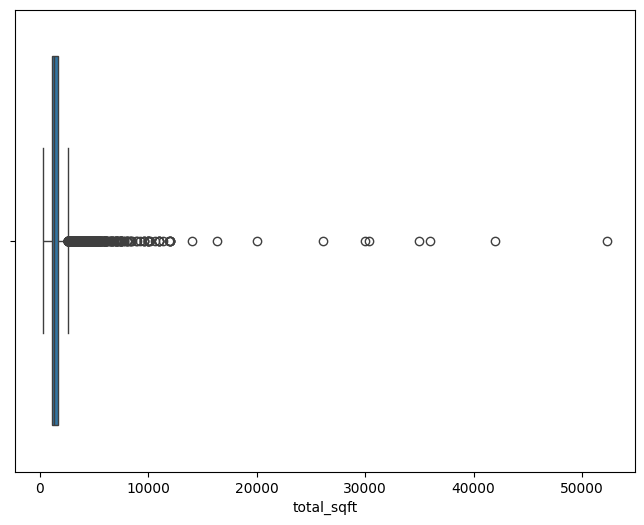

In [375]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['total_sqft'])
plt.show()

In [376]:
Q1 = data['total_sqft'].quantile(0.25)
Q3 = data['total_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['total_sqft'] > lower_bound) & (data['total_sqft'] < upper_bound)]

data

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
5,Whitefield,1170.0,2.0,38.00,2.0
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2.0
13313,Uttarahalli,1345.0,2.0,57.00,3.0
13314,Green Glen Layout,1715.0,3.0,112.00,3.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


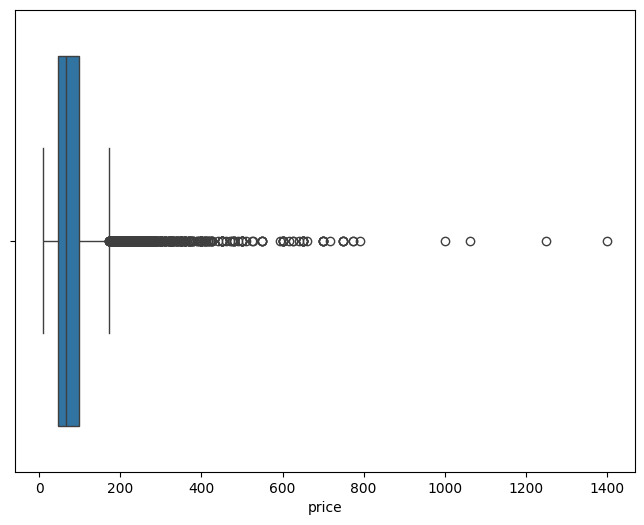

In [377]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['price'])
plt.show()

In [378]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price'] > lower_bound) & (data['price'] < upper_bound)]

data

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
5,Whitefield,1170.0,2.0,38.00,2.0
...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,47.00,2.0
13313,Uttarahalli,1345.0,2.0,57.00,3.0
13314,Green Glen Layout,1715.0,3.0,112.00,3.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0


In [379]:
price_per_are=data.groupby("location")['price'].mean().sort_values(ascending=False).head(10)

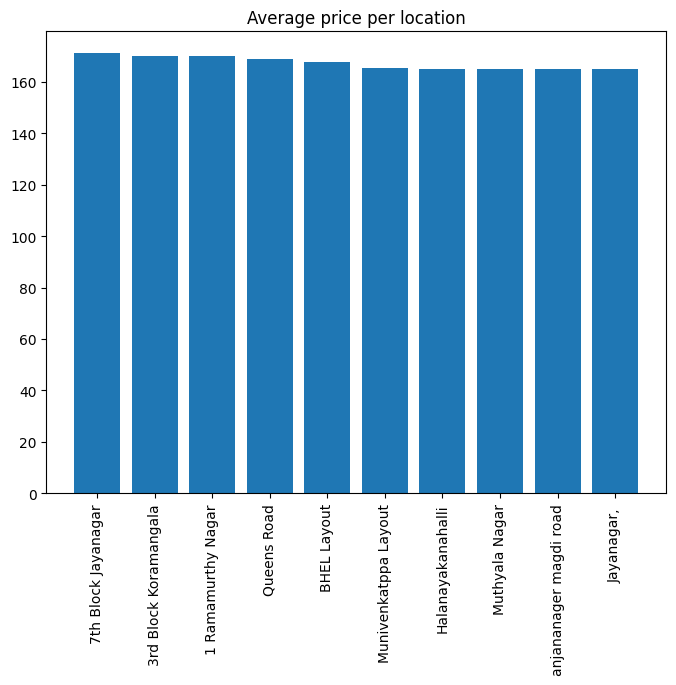

In [380]:
plt.figure(figsize=(8,6))
plt.bar(x=price_per_are.index, height=price_per_are.values)
plt.title('Average price per location')
plt.xticks(rotation=90)
plt.show()

In [381]:
data.location.value_counts()

,count
location,
Whitefield,424
Sarjapur Road,313
Electronic City,289
Kanakpura Road,256
Thanisandra,221
...,...
kadubisnahalli,1
Chamundi Nagar,1
Udayagiri,1


In [382]:
location_stats=data.location.value_counts()

**Locations having less than 10 observations are not considered**

In [383]:
others=[i for i in location_stats.index if location_stats[i]<=10]

In [384]:
data['location']=data['location'].apply(lambda x:"Others" if x in others else x)

In [385]:
data.location.value_counts()["Others"]

np.int64(2258)

In [386]:
data=data[data.location!="Others"]

**If the house containes more than 2 bath Rooms than number of bed rooms is not considered**

In [387]:
data=data[data["bath"]<data["bhk"]+2]

In [388]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

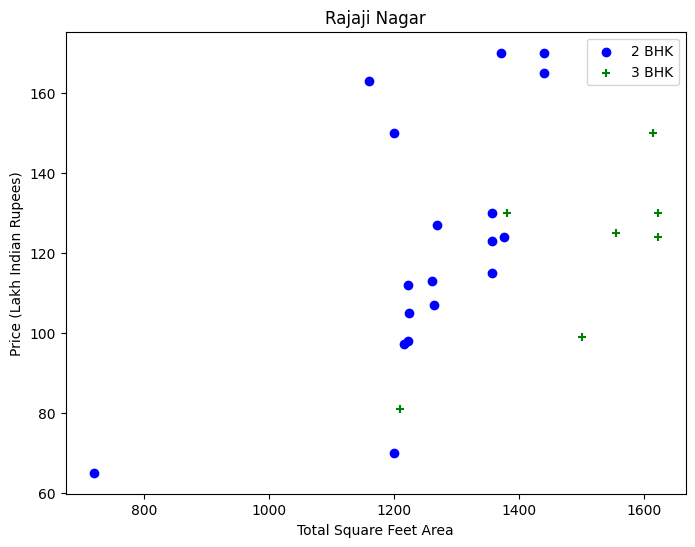

In [389]:
plot_scatter_chart(data,"Rajaji Nagar")

In [390]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price),
                'std': np.std(bhk_df.price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
data.shape

(7701, 5)

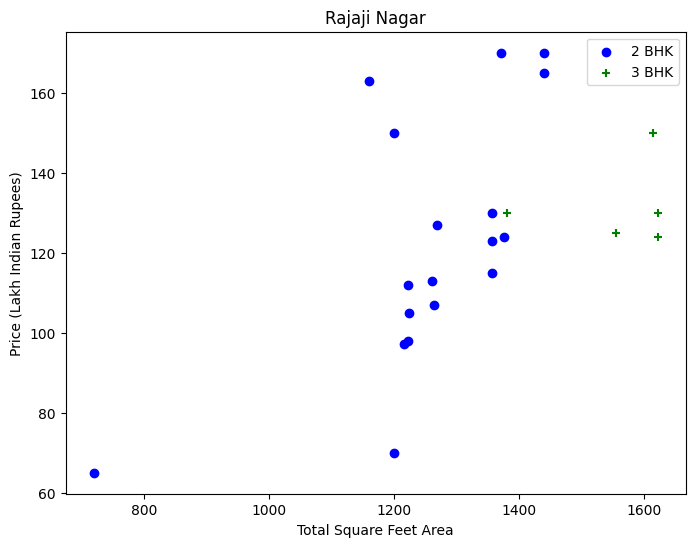

In [391]:
plot_scatter_chart(data,"Rajaji Nagar")

In [392]:
data=pd.get_dummies(data,columns=['location'])
data

,total_sqft,bath,price,bhk,location_ Devarachikkanahalli,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,...,location_Vasanthapura,location_Vidyaranyapura,location_Vijayanagar,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,39.07,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1800.0,2.0,70.00,3.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,1262.0,2.0,47.00,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13313,1345.0,2.0,57.00,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13314,1715.0,3.0,112.00,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,1141.0,2.0,60.00,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Model Building**

In [393]:
X=data.drop(columns=["price"])
Y=data.price

In [394]:
X.shape

(7701, 202)

In [395]:
Y.shape

(7701,)

In [396]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [397]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(5390, 202) (2311, 202) (5390,) (2311,)


In [398]:
model=LinearRegression()
model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.7233000250293087

In [399]:
train_preds = model.predict(X_train)

test_preds = model.predict(X_test)

train_r2 = r2_score(Y_train, train_preds)
test_r2 = r2_score(Y_test, test_preds)

train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training R^2: 0.7233000250293087
Test R^2: 0.7167086487335096
Training MSE: 292.36010135834
Test MSE: 303.02564772056337


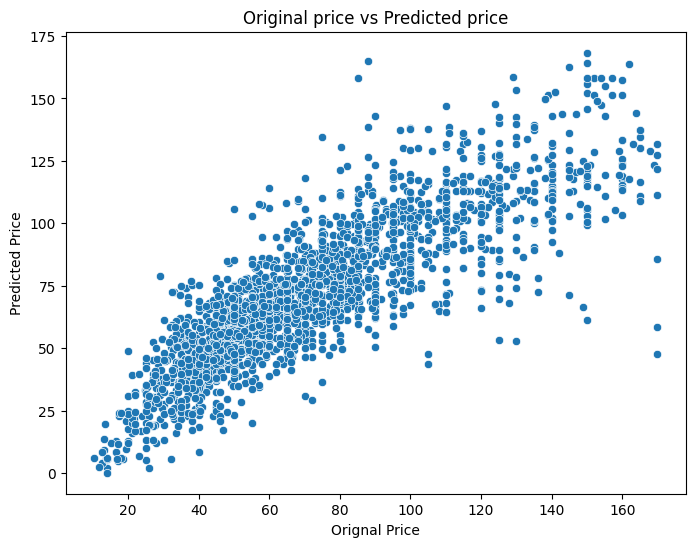

In [400]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=test_preds)
plt.xlabel("Orignal Price")
plt.ylabel("Predicted Price")
plt.title("Original price vs Predicted price")
plt.show()